In [1]:
# loan data mining
# part 4
# accuracy plots of model performance
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.utils.multiclass import type_of_target
from scipy import stats

In [2]:
# import train and test subset
train=pd.read_csv('loantrain.csv')
test=pd.read_csv('loantest.csv')

In [3]:
# drop cust_id
train=train.drop('custid',axis=1)
test=test.drop('custid',axis=1)

In [4]:
# fill missing value which 0 to get a complete subset
# then try to drop data which observations have many NaN in some columns
train = train.replace(np.nan, 0)
test = test.replace(np.nan, 0)

In [11]:
X_train = train.drop('status',axis=1)
y_train = train['status']
X_test = test.drop('status',axis=1)
y_test = test['status']

In [ ]:
# The interpretion of evaluation by confusion matrix
# four numbers in CM are: True Positives (TP), True Negative (TN), False Positives (FP) and False Megative (FN)
# Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations.
# Accuracy = TP+TN/TP+FP+FN+TN

# Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
# Precision = TP/TP+FP

# Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
# Recall = TP/TP+FN

# F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.
# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 
# ROC curve plots two parameters: True Positive Rate and False Positive Rate

# AUC stands for "Area under the ROC Curve." 
# AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc

In [13]:
#  refer code
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # Prediction
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # Accuracy
    print('[Accuracy]', end = ' ')
    print('Train：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('Test：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # Precision
    print('[Precision]', end = ' ')
    print('Train：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('Test：', '%.4f'%precision_score(y_test, y_test_pred))

    # Recall
    print('[Recall]', end = ' ')
    print('Train：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('Test：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('Trian：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('Test：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC
    print('[auc值]', end = ' ')
    print('Trian：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('Test：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # ROC
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

oob score： 0.7899639423076923
[Accuracy] Train： 0.8179 Test： 0.7896
[Precision] Train： 0.8662 Test： 0.7500
[Recall] Train： 0.3139 Test： 0.2772
[f1-score] Trian： 0.4609 Test： 0.4048
[auc值] Trian： 0.8962 Test： 0.7993


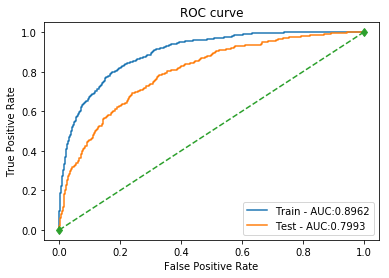

In [21]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2018)
rf.fit(X_train, y_train)
print('oob score：', rf.oob_score_)
model_metrics(rf, X_train, X_test, y_train, y_test)
feature_importance1 = sorted(zip(map(lambda x: '%.4f'%x, rf.feature_importances_), list(X_train.columns)), reverse=True)

[Accuracy] Train： 0.7978 Test： 0.7966
[Precision] Train： 0.6929 Test： 0.6931
[Recall] Train： 0.3309 Test： 0.3804
[f1-score] Trian： 0.4479 Test： 0.4912
[auc值] Trian： 0.8004 Test： 0.7879


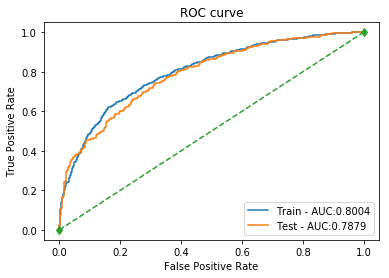

In [17]:
# Logistic Regreesion
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 0.1, penalty = 'l1')
lr.fit(X_train, y_train.values)
model_metrics(lr, X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[Accuracy] Train： 0.8422 Test： 0.7973
[Precision] Train： 0.8289 Test： 0.6927
[Recall] Train： 0.4582 Test： 0.3859
[f1-score] Trian： 0.5902 Test： 0.4956
[auc值] Trian： 0.8838 Test： 0.8034


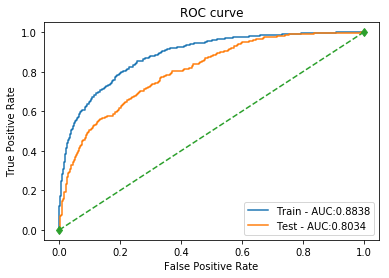

In [22]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate =0.1, n_estimators=80, max_depth=3, min_child_weight=5,\
                    gamma=0.2, subsample=0.8, colsample_bytree=0.8, reg_alpha=1e-5,\
                    objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=2018)
xgb.fit(X_train, y_train.values)
model_metrics(xgb, X_train, X_test, y_train, y_test)

[Accuracy] Train： 0.7800 Test： 0.7588
[Precision] Train： 0.6946 Test： 0.6034
[Recall] Train： 0.2012 Test： 0.1902
[f1-score] Trian： 0.3120 Test： 0.2893
[auc值] Trian： 0.7363 Test： 0.6919


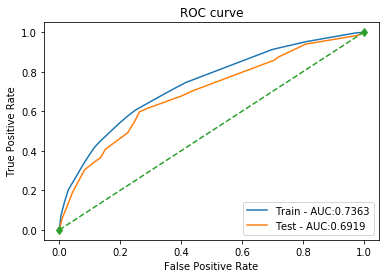

In [23]:
# decission tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=50,min_samples_leaf=60, max_features=9, random_state =2018)
dt.fit(X_train, y_train.values)
model_metrics(dt, X_train, X_test, y_train, y_test)

[Accuracy] Train： 0.7521 Test： 0.7419
[Precision] Train： 0.0000 Test： 0.0000
[Recall] Train： 0.0000 Test： 0.0000
[f1-score] Trian： 0.0000 Test： 0.0000
[auc值] Trian： 0.7694 Test： 0.7735


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


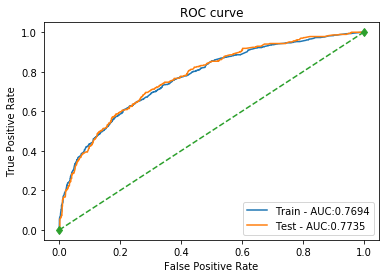

In [26]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
clf = RandomForestClassifier(max_depth=2, random_state=2018)
clf.fit(X_train, y_train.values)
model_metrics(clf, X_train, X_test, y_train, y_test)

In [27]:
from sklearn import svm

In [28]:
# SVM
svm_linear = svm.SVC(C = 0.01, kernel = 'linear', probability=True)
svm_poly =  svm.SVC(C = 0.01, kernel = 'poly', probability=True)
svm_rbf =  svm.SVC(gamma = 0.01, C =0.01 , probability=True)
svm_sigmoid =  svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)

In [ ]:
svm_linear.fit(X_train, y_train.values)
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

In [ ]:
svm_poly.fit(X_train, y_train.values)
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

In [ ]:
svm_rbf.fit(X_train, y_train.values)
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

In [ ]:
svm_sigmoid.fit(X_train, y_train.values)
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)